### ME323 C - Porta dos Desesparados

Fernanda Alencar de Barbosa - 2##### <br>
Gustavo Nascimento Soares - 217530

In [82]:
import random as rd
import matplotlib.pyplot as plt

In [83]:
N = 100000
nDoors = 3

def finalOption(a, b):
    options = [i+1 for i in range(nDoors)]
    options.remove(a)
    options.remove(b)
    return options[0]
    
rightAnswer = [rd.randint(1, nDoors) for i in range(N)]
guess = {
    'NS': [rd.randint(1, nDoors) for i in range(N)],
    'S': [],
    } # NS == No Switch, S == Switch
reveal = [] # number of revealed door

for i in range(N):
    if rightAnswer[i] == guess['NS'][i]:
        options = [i+1 for i in range(nDoors)]
        options.remove(rightAnswer[i])
        reveal.append(rd.choice(options))
    else:
        reveal.append(finalOption(guess['NS'][i], rightAnswer[i]))
        

for i in range(N):
    guess['S'].append(finalOption(guess['NS'][i], reveal[i]))

In [84]:
result = {
    'NS': [True if rightAnswer[i] == guess['NS'][i] else False for i in range(N)],
    'S': [True if rightAnswer[i] == guess['S'][i] else False for i in range(N)],
}

pct = {
    'NS': result['NS'].count(True)/N*100,
    'S': result['S'].count(True)/N*100,	
}

In [85]:
accF = {
    'NS': [],
    'S': [],
}
for key in result.keys():
    count = 0
    for i in range(N):
        if result[key][i]:
            count += 1
        accF[key].append(count/(i+1))

No Switch: 33.262%
Switch: 66.738%


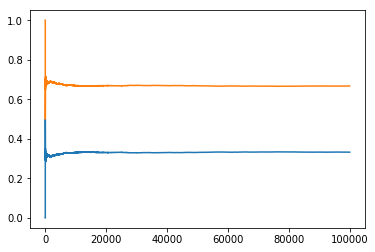

In [86]:
print("No Switch: {0:.3f}%\nSwitch: {1:.3f}%".format(pct['NS'], pct['S']))
plt.plot(range(1, N+1), accF['NS'])
plt.plot(range(1, N+1), accF['S'])
plt.show()